/tmp/ipython-input-2629646194.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-2629646194.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

✅ Data Cleaning Done!

Remaining Missing Values:
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Deck        0
dtype: int64


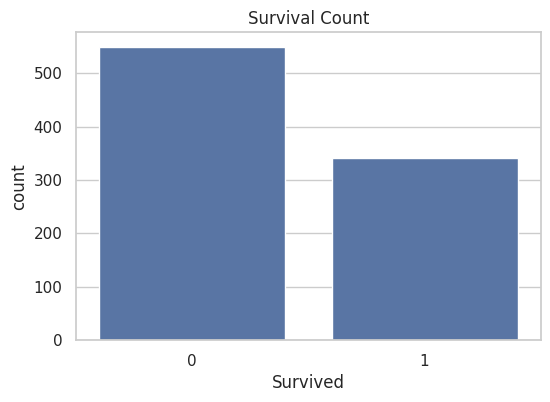

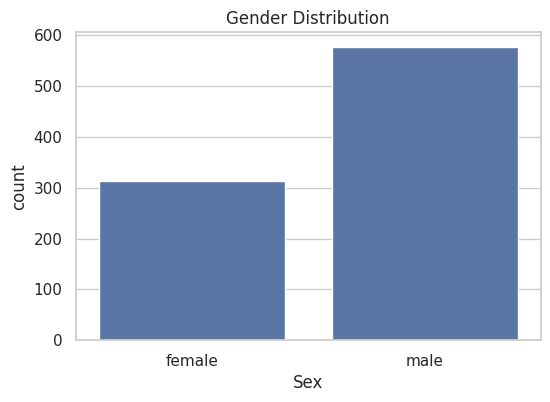

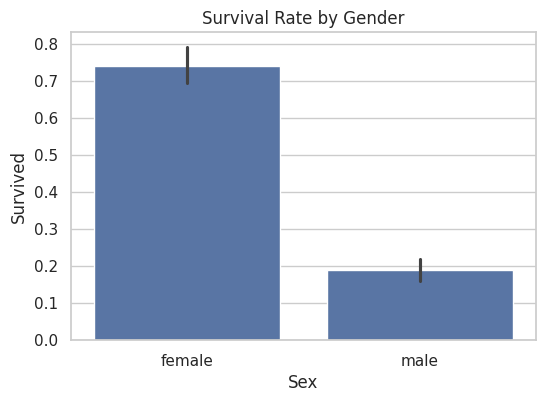

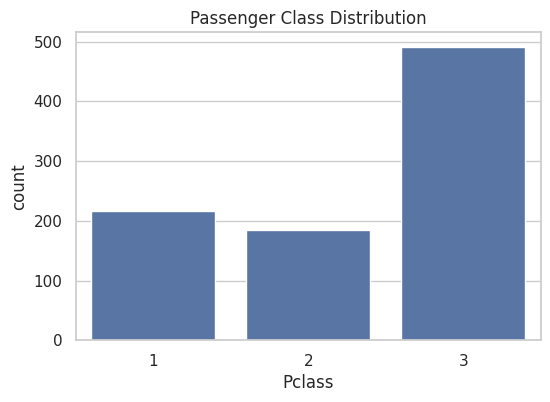

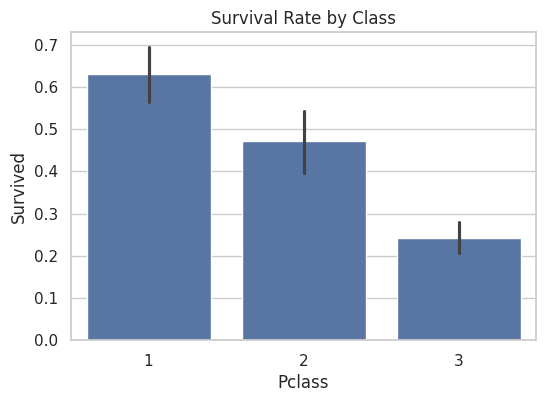

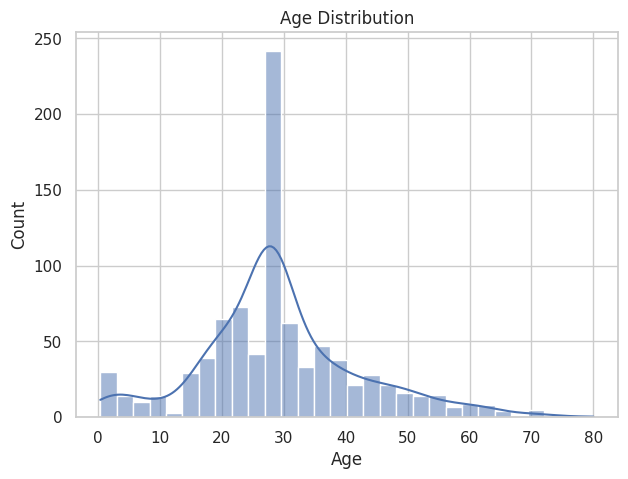

/tmp/ipython-input-2629646194.py:82: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["Survived"]==1]["Age"], label="Survived", shade=True)
/tmp/ipython-input-2629646194.py:83: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["Survived"]==0]["Age"], label="Not Survived", shade=True)


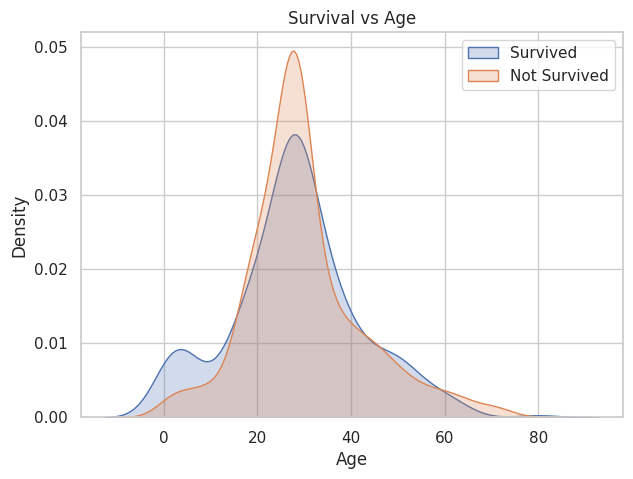

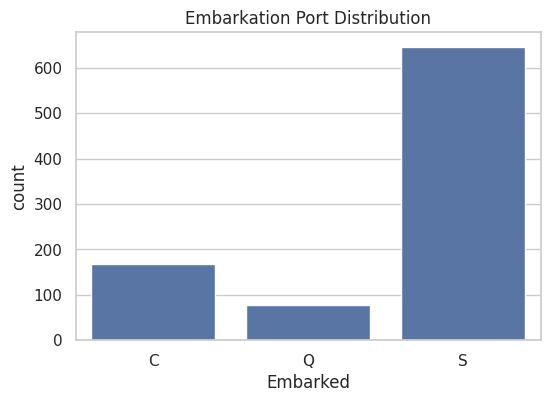

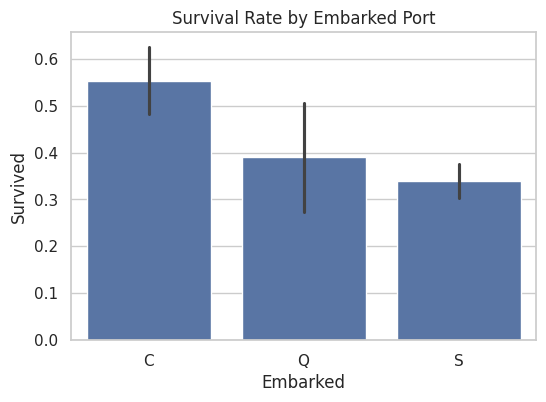

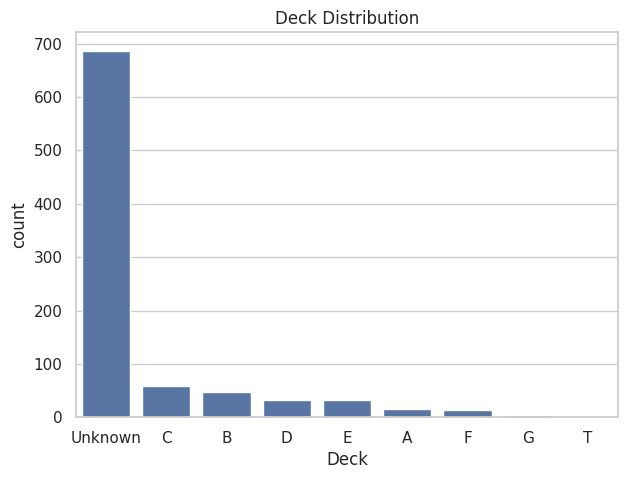

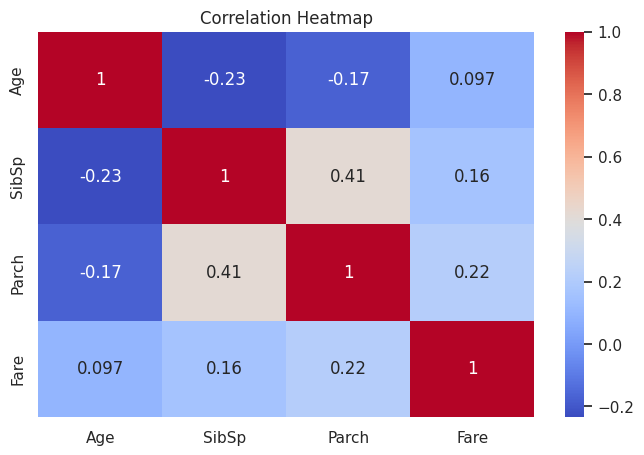

In [1]:
# ------------------------------------
# 📍 TITANIC DATA CLEANING + EDA
# ------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Professional theme
sns.set_theme(style="whitegrid")

# Load dataset
df = pd.read_csv("train.csv")

# -----------------------
# 🔧 DATA CLEANING
# -----------------------

# Fill missing Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Extract Deck from Cabin
df['Deck'] = df['Cabin'].astype(str).str[0]
df['Deck'] = df['Deck'].replace('n', 'Unknown')   # n = nan string after conversion

# Convert to category type
for col in ['Survived', 'Pclass', 'Sex', 'Embarked', 'Deck']:
    df[col] = df[col].astype('category')

# Drop irrelevant columns for EDA
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

print("✅ Data Cleaning Done!")
print("\nRemaining Missing Values:\n", df.isnull().sum())

# -----------------------
# 📊 EDA
# -----------------------

# 1. Survival Count
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

# 2. Gender Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', data=df)
plt.title("Gender Distribution")
plt.show()

# 3. Survival by Gender
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y=df['Survived'].astype('int'), data=df)
plt.title("Survival Rate by Gender")
plt.show()

# 4. Passenger Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', data=df)
plt.title("Passenger Class Distribution")
plt.show()

# 5. Survival by Passenger Class
plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y=df['Survived'].astype('int'), data=df)
plt.title("Survival Rate by Class")
plt.show()

# 6. Age Distribution
plt.figure(figsize=(7,5))
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

# 7. Survival by Age
plt.figure(figsize=(7,5))
sns.kdeplot(df[df["Survived"]==1]["Age"], label="Survived", shade=True)
sns.kdeplot(df[df["Survived"]==0]["Age"], label="Not Survived", shade=True)
plt.title("Survival vs Age")
plt.legend()
plt.show()

# 8. Embarked Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Embarked', data=df)
plt.title("Embarkation Port Distribution")
plt.show()

# 9. Survival by Embarked
plt.figure(figsize=(6,4))
sns.barplot(x='Embarked', y=df['Survived'].astype('int'), data=df)
plt.title("Survival Rate by Embarked Port")
plt.show()

# 10. Deck Distribution
plt.figure(figsize=(7,5))
sns.countplot(x='Deck', data=df, order=df['Deck'].value_counts().index)
plt.title("Deck Distribution")
plt.show()

# 11. Correlation Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
